<a href="https://colab.research.google.com/github/KAMAL0657/KAMAL-HUSSAIN/blob/main/KamalHussain_Python_Assignment_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# KamalHussain_Python_Assignment.Week end 2

**Author:** Kamal Hussain  




## SETUP & DATA LOAD

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (8, 5)

# Load dataset
# Option A (local path in this notebook environment)
csv_path = '/content/Sales_Assignment.csv'
df = pd.read_csv(csv_path, parse_dates=["Sale_Date"])

df.head()

,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode
0,1,Neha Singh,North,Groceries,Wheat,2,1243,2486,2025-01-12,0.03,Credit Card
1,2,Parth Patel,West,Electronics,Mobile,1,1891,1891,2024-04-29,0.15,Credit Card
2,3,Meera Menon,South,Sports,Gym Equipment,2,3779,7558,2024-10-28,0.08,Credit Card
3,4,Pooja Nair,West,Groceries,Milk,2,1863,3726,2025-01-25,0.10,Credit Card
4,5,Manoj Bhat,North,Groceries,Milk,5,2266,11330,2024-01-23,0.22,Credit Card


### Quick sanity checks

In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sale_ID         65 non-null     int64         
 1   Customer_Name   65 non-null     object        
 2   Region          65 non-null     object        
 3   Category        65 non-null     object        
 4   Product         65 non-null     object        
 5   Quantity        65 non-null     int64         
 6   Price_per_Unit  65 non-null     int64         
 7   Total_Amount    65 non-null     int64         
 8   Sale_Date       65 non-null     datetime64[ns]
 9   Discount        65 non-null     float64       
 10  Payment_Mode    65 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 5.7+ KB


## Part 1: Matplotlib Visualization (Q1–Q10)

### Q1. Line chart: Total_Amount for first 20 sales

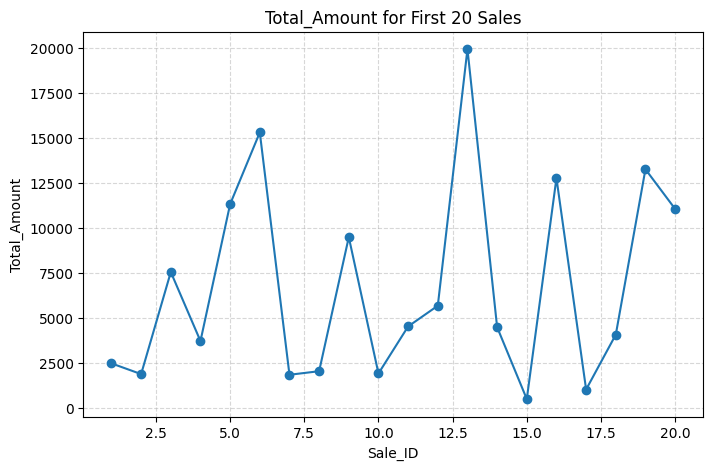

In [ ]:

sub = df.head(20)
plt.figure()
plt.plot(sub["Sale_ID"], sub["Total_Amount"], marker="o")  # using default color per assignment tool rules
plt.xlabel("Sale_ID")
plt.ylabel("Total_Amount")
plt.title("Total_Amount for First 20 Sales")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### Q2. Total_Amount and Quantity on same graph (first 15 sales)

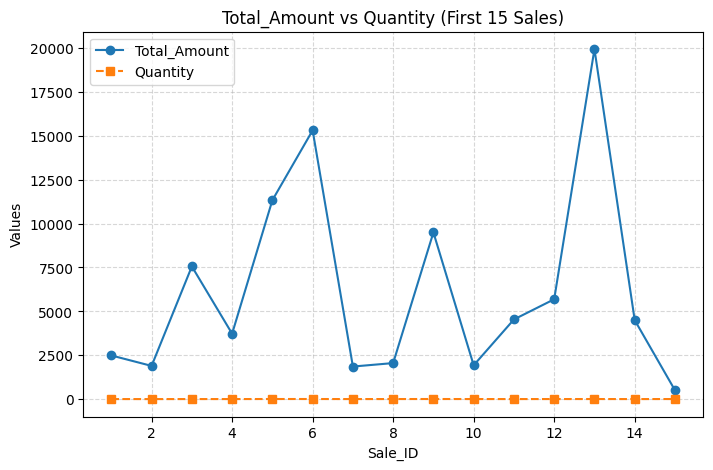

In [ ]:

sub15 = df.head(15)
plt.figure()
plt.plot(sub15["Sale_ID"], sub15["Total_Amount"], marker="o", linestyle="-")
plt.plot(sub15["Sale_ID"], sub15["Quantity"], marker="s", linestyle="--")
plt.xlabel("Sale_ID")
plt.ylabel("Values")
plt.title("Total_Amount vs Quantity (First 15 Sales)")
plt.legend(["Total_Amount", "Quantity"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### Q3. Bar plot: total sales amount per Region

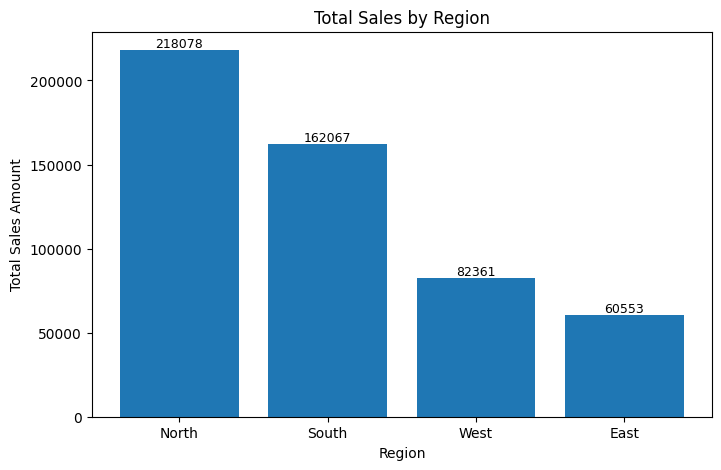

In [ ]:

region_sales = df.groupby("Region")["Total_Amount"].sum().sort_values(ascending=False)
plt.figure()
plt.bar(region_sales.index, region_sales.values)  # distinct default colors not set per tool rules
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.title("Total Sales by Region")
plt.xticks(rotation=0)
for i, v in enumerate(region_sales.values):
    plt.text(i, v, f"{v}", ha="center", va="bottom", fontsize=9, rotation=0)
plt.show()


### Q4. Scatter: Quantity vs Total_Amount

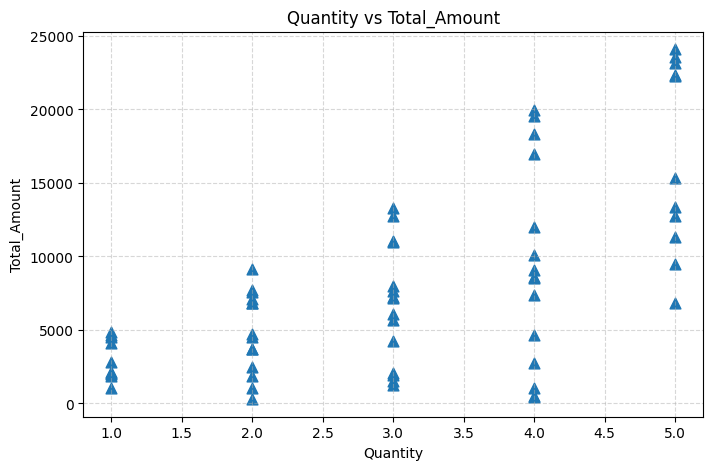

In [ ]:

plt.figure()
plt.scatter(df["Quantity"], df["Total_Amount"], s=60, marker="^")
plt.xlabel("Quantity")
plt.ylabel("Total_Amount")
plt.title("Quantity vs Total_Amount")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### Q5. Histogram: Price_per_Unit distribution

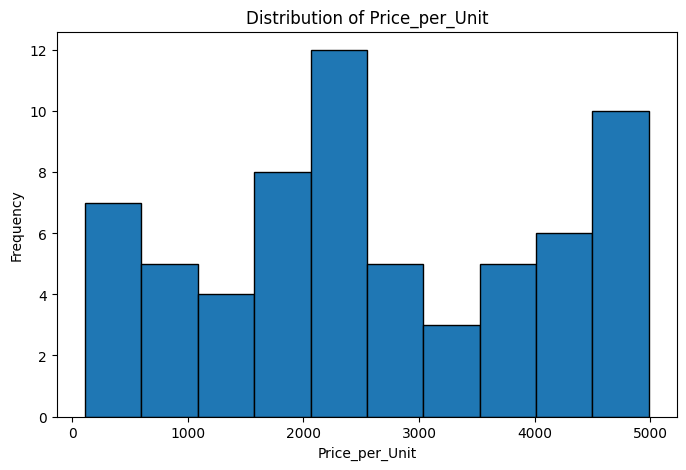

In [ ]:

plt.figure()
plt.hist(df["Price_per_Unit"], bins=10, edgecolor="black")
plt.xlabel("Price_per_Unit")
plt.ylabel("Frequency")
plt.title("Distribution of Price_per_Unit")
plt.show()


### Q6. Pie chart: proportion of sales by Category

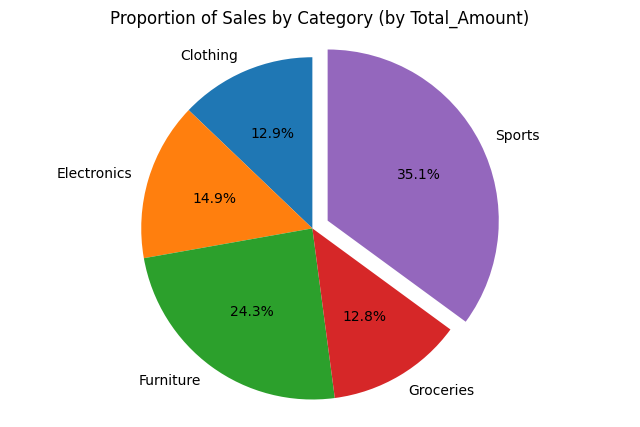

In [ ]:

cat_sales = df.groupby("Category")["Total_Amount"].sum()
explode = [0.1 if v == cat_sales.max() else 0.0 for v in cat_sales.values]
plt.figure()
plt.pie(cat_sales.values, labels=cat_sales.index, autopct="%1.1f%%", explode=explode, startangle=90)
plt.title("Proportion of Sales by Category (by Total_Amount)")
plt.axis("equal")
plt.show()


### Q7. Box plot: Total_Amount by Region

/tmp/ipython-input-4241349831.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=df["Region"].unique(), showmeans=True)


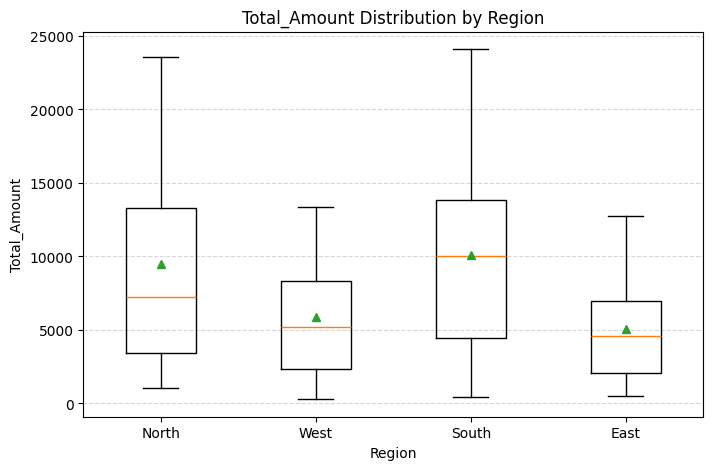

{'North': Series([], Name: Total_Amount, dtype: int64),
 'West': Series([], Name: Total_Amount, dtype: int64),
 'South': Series([], Name: Total_Amount, dtype: int64),
 'East': Series([], Name: Total_Amount, dtype: int64)}

In [ ]:

plt.figure()
data = [df[df["Region"] == r]["Total_Amount"] for r in df["Region"].unique()]
plt.boxplot(data, labels=df["Region"].unique(), showmeans=True)
plt.xlabel("Region")
plt.ylabel("Total_Amount")
plt.title("Total_Amount Distribution by Region")
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.show()

# Basic outlier identification (IQR method) per region
def iqr_outliers(series):
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return series[(series < lower) | (series > upper)]

outliers_by_region = {r: iqr_outliers(df.loc[df["Region"] == r, "Total_Amount"]) for r in df["Region"].unique()}
outliers_by_region


### Q8. 3D scatter: Quantity (x), Price_per_Unit (y), Total_Amount (z), color by Region

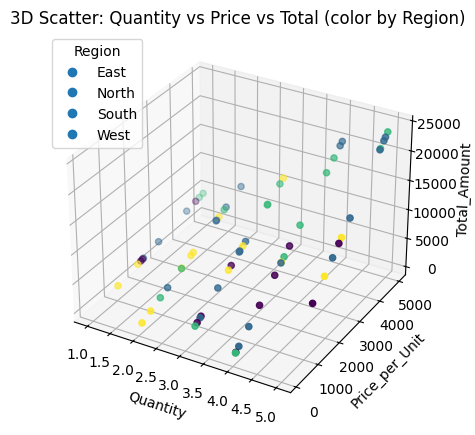

In [ ]:

from matplotlib.cm import get_cmap

regions = df["Region"].astype("category")
colors = regions.cat.codes  # numeric codes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df["Quantity"], df["Price_per_Unit"], df["Total_Amount"], c=colors)
ax.set_xlabel("Quantity")
ax.set_ylabel("Price_per_Unit")
ax.set_zlabel("Total_Amount")
ax.set_title("3D Scatter: Quantity vs Price vs Total (color by Region)")
# Legend mapping
handles = [plt.Line2D([0],[0], marker='o', linestyle='', label=cat) for cat in regions.cat.categories]
ax.legend(handles, regions.cat.categories, title="Region", loc="best")
plt.show()


### Q9. Stacked bar: total sales per Region split by Category

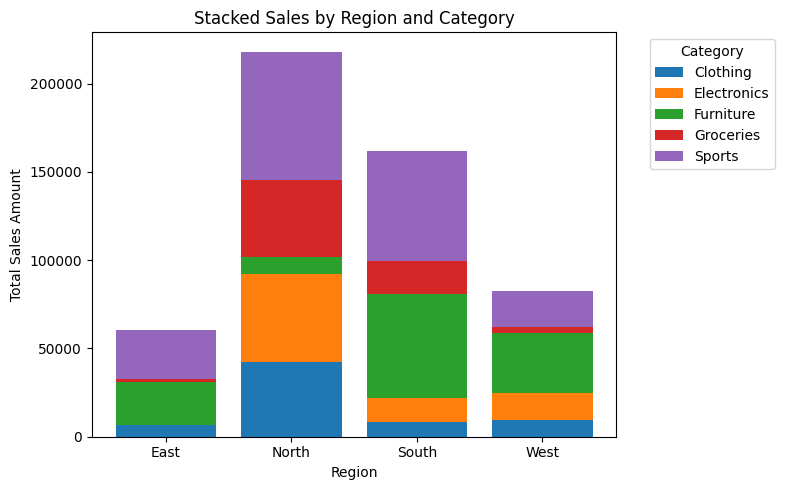

In [ ]:

pivot_rc = df.pivot_table(index="Region", columns="Category", values="Total_Amount", aggfunc="sum").fillna(0)
pivot_rc = pivot_rc.loc[sorted(pivot_rc.index)]
bottom = np.zeros(len(pivot_rc))
plt.figure()
for cat in pivot_rc.columns:
    plt.bar(pivot_rc.index, pivot_rc[cat].values, bottom=bottom)  # default colors
    bottom += pivot_rc[cat].values
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.title("Stacked Sales by Region and Category")
plt.xticks(rotation=0)
plt.legend(pivot_rc.columns, title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Q10. Line chart: average Total_Amount per month

/tmp/ipython-input-483521757.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index("Sale_Date").resample("M")["Total_Amount"].mean()


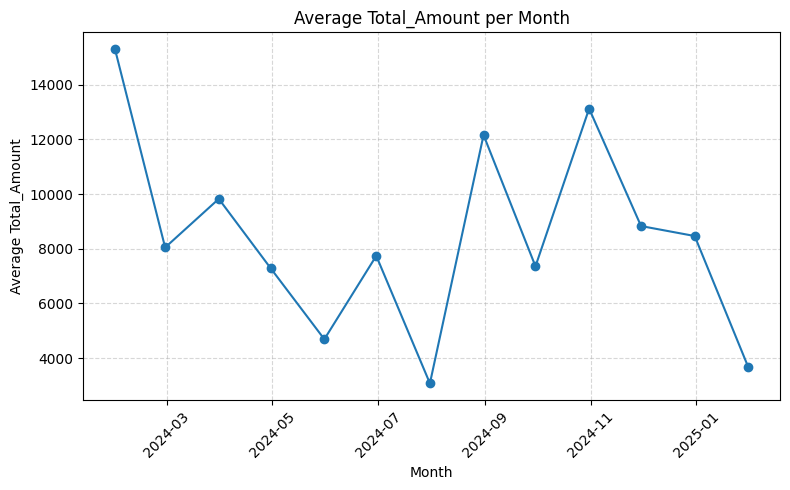

In [ ]:

monthly = df.set_index("Sale_Date").resample("M")["Total_Amount"].mean()
plt.figure()
plt.plot(monthly.index, monthly.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Average Total_Amount")
plt.title("Average Total_Amount per Month")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Part 2: Seaborn Advanced Visualization (Q11–Q19)

### Q11. Correlation heatmap for numerical columns

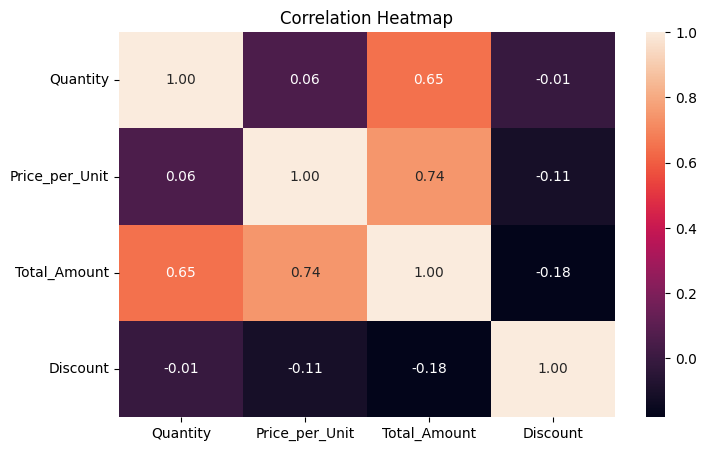

In [ ]:

num_cols = ["Quantity", "Price_per_Unit", "Total_Amount", "Discount"]
corr = df[num_cols].corr()
plt.figure()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Q12. Cluster map for numerical features

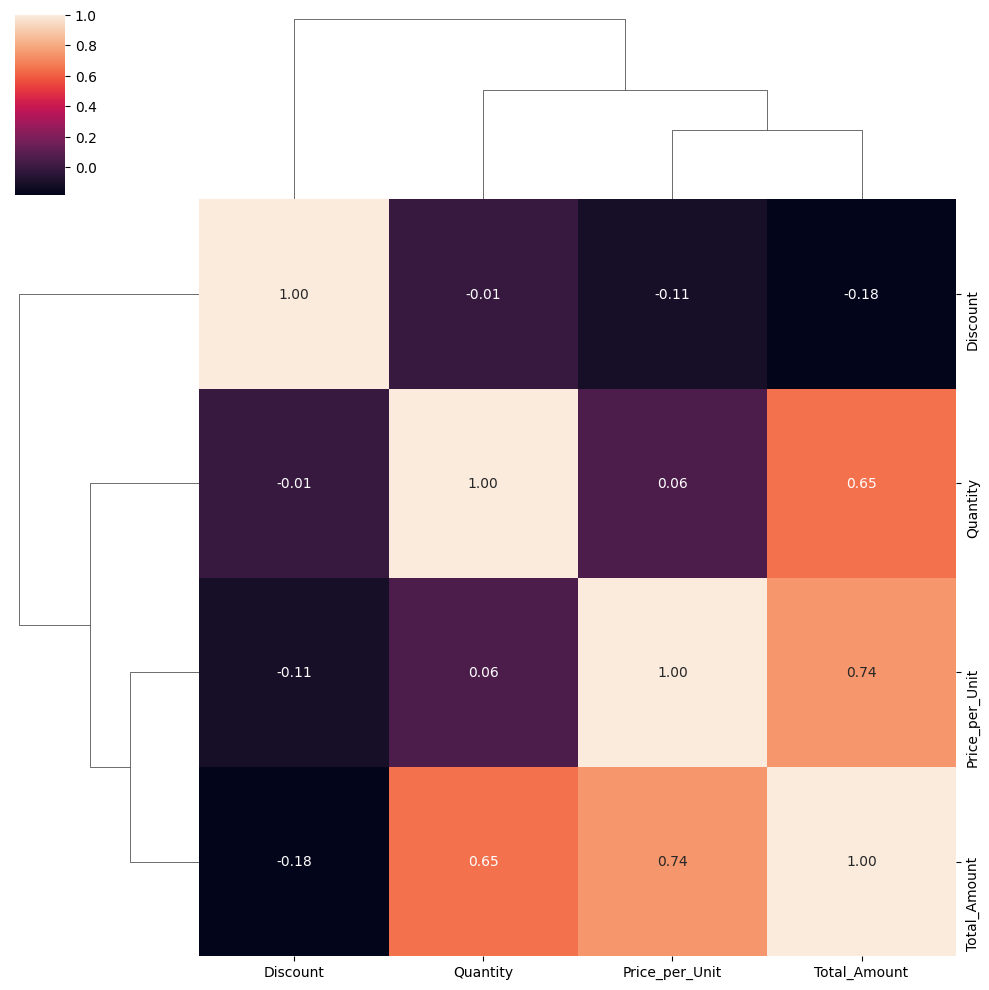

In [ ]:

sns.clustermap(corr, annot=True, fmt=".2f")
plt.show()


### Q13. ECDF of Discount

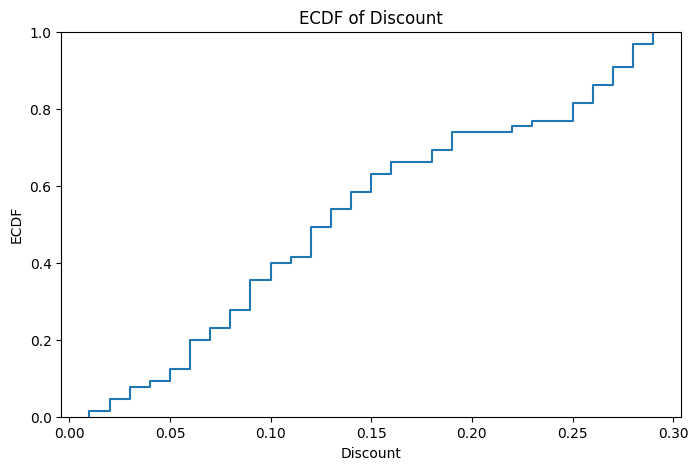

In [ ]:

plt.figure()
sns.ecdfplot(df["Discount"])
plt.title("ECDF of Discount")
plt.xlabel("Discount")
plt.ylabel("ECDF")
plt.show()


### Q14. Pair plot for numerical vars with hue=Region and regression lines

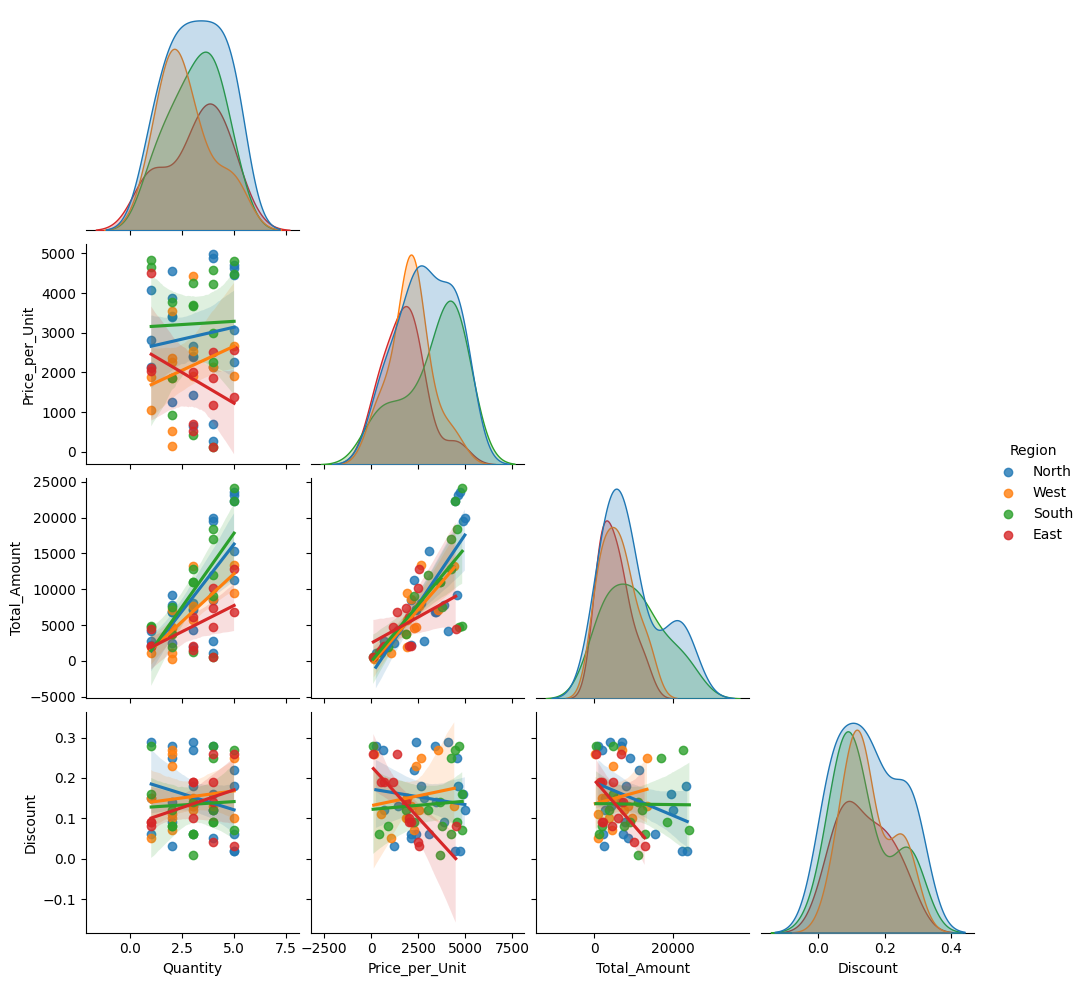

In [ ]:

sns.pairplot(df[num_cols + ["Region"]], hue="Region", kind="reg", corner=True)
plt.show()


### Q15. Joint plot: Quantity vs Total_Amount, hue=Category

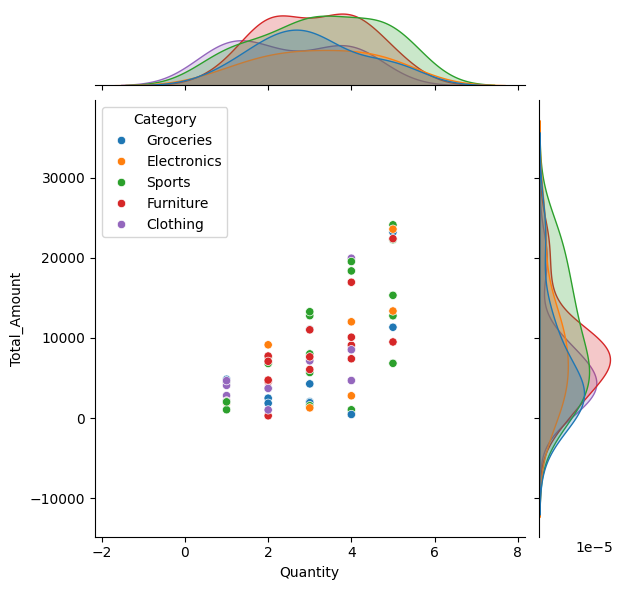

In [ ]:

sns.jointplot(data=df, x="Quantity", y="Total_Amount", hue="Category")
plt.show()


### Q16. Box plot: Total_Amount by Payment_Mode

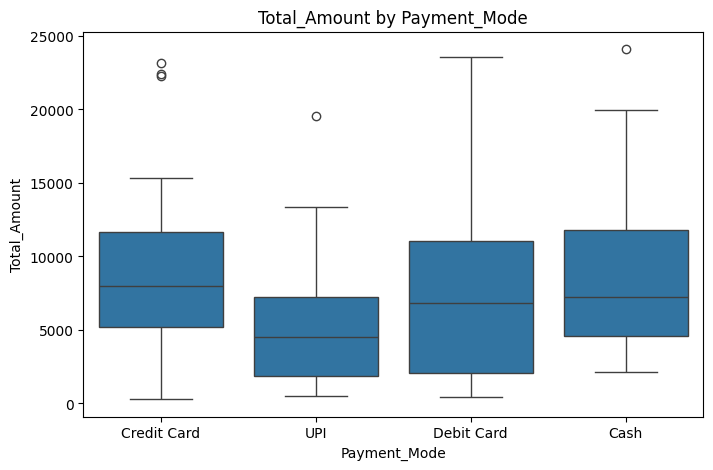

In [ ]:

plt.figure()
sns.boxplot(data=df, x="Payment_Mode", y="Total_Amount")
plt.title("Total_Amount by Payment_Mode")
plt.show()


### Q17. Bubble plot: Price_per_Unit vs Total_Amount (size=Quantity, color=Category)

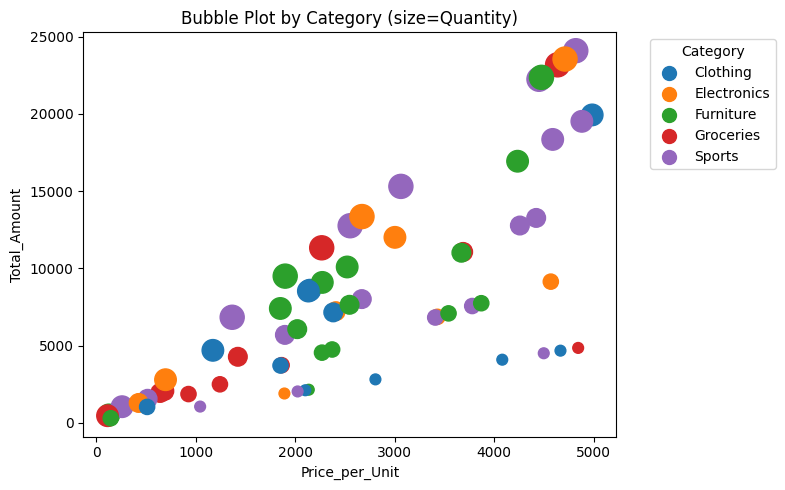

In [ ]:

plt.figure()
# Map categories to numeric colors via seaborn palette
cats = df["Category"].astype("category")
palette = sns.color_palette(n_colors=len(cats.cat.categories))
color_map = {cat: palette[i] for i, cat in enumerate(cats.cat.categories)}
colors = df["Category"].map(color_map)
sizes = (df["Quantity"] - df["Quantity"].min() + 1) * 60  # scale sizes
plt.scatter(df["Price_per_Unit"], df["Total_Amount"], s=sizes, c=colors)
plt.xlabel("Price_per_Unit")
plt.ylabel("Total_Amount")
plt.title("Bubble Plot by Category (size=Quantity)")
# Legend
for cat, col in color_map.items():
    plt.scatter([], [], s=100, c=[col], label=cat)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Q18. Violin plot: distribution of Total_Amount per Category

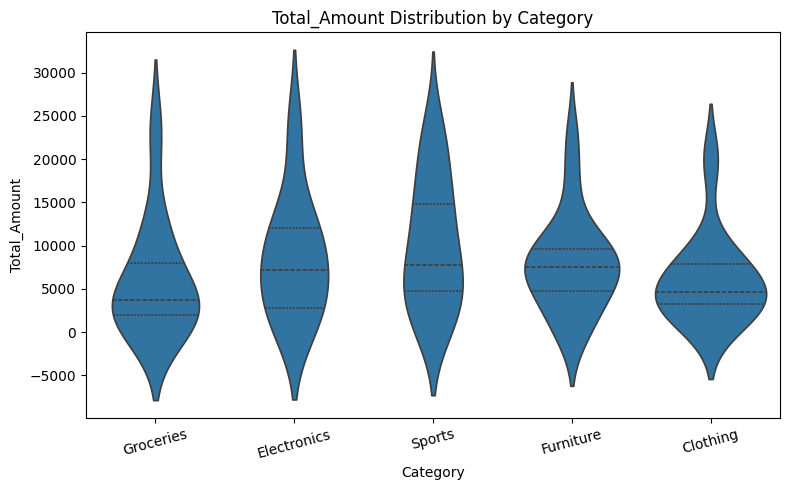

In [ ]:

plt.figure()
sns.violinplot(data=df, x="Category", y="Total_Amount", inner="quartile")
plt.title("Total_Amount Distribution by Category")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Q19. Heatmap: average Total_Amount for Region × Payment_Mode

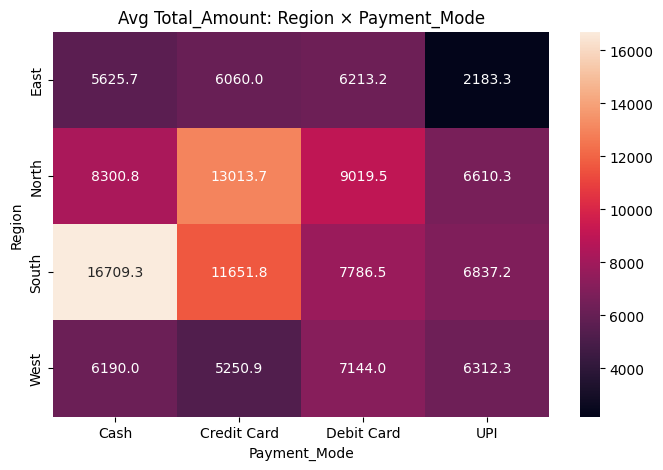

In [ ]:

pivot_rp = df.pivot_table(index="Region", columns="Payment_Mode", values="Total_Amount", aggfunc="mean")
plt.figure()
sns.heatmap(pivot_rp, annot=True, fmt=".1f")
plt.title("Avg Total_Amount: Region × Payment_Mode")
plt.show()


## Part 3: Pandas Data Cleaning & Indexing (Q20–Q26)

### Q20. Total number of missing values per column

In [ ]:

df.isna().sum()


,0
Sale_ID,0
Customer_Name,0
Region,0
Category,0
Product,0
Quantity,0
Price_per_Unit,0
Total_Amount,0
Sale_Date,0
Discount,0


### Q21. `.loc` – North region where Quantity > 3

In [ ]:

df.loc[(df["Region"] == "North") & (df["Quantity"] > 3)]


,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode
4,5,Manoj Bhat,North,Groceries,Milk,5,2266,11330,2024-01-23,0.22,Credit Card
5,6,Manoj Bhat,North,Sports,Tennis Racket,5,3062,15310,2024-10-22,0.06,Credit Card
12,13,Priya Sharma,North,Clothing,Jeans,4,4985,19940,2024-02-02,0.12,Cash
16,17,Pooja Nair,North,Sports,Tennis Racket,4,259,1036,2024-02-27,0.28,UPI
20,21,Ananya Joshi,North,Groceries,Rice,5,4637,23185,2024-04-27,0.18,Credit Card
29,30,Priya Sharma,North,Sports,Gym Equipment,5,4450,22250,2024-03-21,0.02,Credit Card
31,32,Parth Patel,North,Sports,Football,4,4881,19524,2024-10-16,0.16,UPI
33,34,Harish Iyer,North,Electronics,Camera,5,4712,23560,2024-02-21,0.02,Debit Card
42,43,Ishita Roy,North,Clothing,Jacket,4,2132,8528,2024-05-16,0.05,Credit Card
53,54,Vikram Desai,North,Electronics,Laptop,4,696,2784,2024-08-21,0.12,Debit Card


### Q22. `.iloc` – first 5 rows and first 4 columns

In [ ]:

df.iloc[:5, :4]


,Sale_ID,Customer_Name,Region,Category
0,1,Neha Singh,North,Groceries
1,2,Parth Patel,West,Electronics
2,3,Meera Menon,South,Sports
3,4,Pooja Nair,West,Groceries
4,5,Manoj Bhat,North,Groceries


### Q23. New column: Final_Amount = Total_Amount - (Total_Amount × Discount)

In [ ]:

df["Final_Amount"] = df["Total_Amount"] * (1 - df["Discount"])
df[["Sale_ID","Total_Amount","Discount","Final_Amount"]].head()


,Sale_ID,Total_Amount,Discount,Final_Amount
0,1,2486,0.03,2411.42
1,2,1891,0.15,1607.35
2,3,7558,0.08,6953.36
3,4,3726,0.10,3353.40
4,5,11330,0.22,8837.40


### Q24. Sort by Total_Amount (descending)

In [ ]:

df_sorted = df.sort_values("Total_Amount", ascending=False)
df_sorted.head(10)


,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode,Final_Amount
22,23,Simran Kaur,South,Sports,Cricket Bat,5,4820,24100,2024-08-30,0.07,Cash,22413.00
33,34,Harish Iyer,North,Electronics,Camera,5,4712,23560,2024-02-21,0.02,Debit Card,23088.80
20,21,Ananya Joshi,North,Groceries,Rice,5,4637,23185,2024-04-27,0.18,Credit Card,19011.70
63,64,Manoj Bhat,South,Furniture,Chair,5,4475,22375,2024-01-14,0.27,Credit Card,16333.75
29,30,Priya Sharma,North,Sports,Gym Equipment,5,4450,22250,2024-03-21,0.02,Credit Card,21805.00
12,13,Priya Sharma,North,Clothing,Jeans,4,4985,19940,2024-02-02,0.12,Cash,17547.20
31,32,Parth Patel,North,Sports,Football,4,4881,19524,2024-10-16,0.16,UPI,16400.16
50,51,Manoj Bhat,South,Sports,Tennis Racket,4,4588,18352,2024-01-01,0.09,Debit Card,16700.32
56,57,Rohit Malhotra,South,Furniture,Sofa,4,4235,16940,2024-08-06,0.25,Cash,12705.00
5,6,Manoj Bhat,North,Sports,Tennis Racket,5,3062,15310,2024-10-22,0.06,Credit Card,14391.40


### Q25. Replace missing values in Discount with column average

In [ ]:

df["Discount"] = df["Discount"].fillna(df["Discount"].mean())
df["Discount"].isna().sum()  # should be 0


np.int64(0)

### Q26. `.loc` – Payment_Mode is "Cash" and Price_per_Unit > 500

In [ ]:

df.loc[(df["Payment_Mode"] == "Cash") & (df["Price_per_Unit"] > 500)]


,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode,Final_Amount
12,13,Priya Sharma,North,Clothing,Jeans,4,4985,19940,2024-02-02,0.12,Cash,17547.20
22,23,Simran Kaur,South,Sports,Cricket Bat,5,4820,24100,2024-08-30,0.07,Cash,22413.00
24,25,Neha Singh,North,Furniture,Sofa,1,2136,2136,2024-04-08,0.06,Cash,2007.84
26,27,Priya Sharma,North,Electronics,Laptop,2,3429,6858,2024-09-05,0.14,Cash,5897.88
27,28,Priya Sharma,South,Furniture,Table,4,2272,9088,2024-08-20,0.09,Cash,8270.08
32,33,Sandeep Reddy,East,Clothing,Jacket,4,1172,4688,2024-12-09,0.19,Cash,3797.28
34,35,Aditya Jain,East,Clothing,Jacket,1,2101,2101,2024-07-08,0.09,Cash,1911.91
38,39,Priya Sharma,North,Groceries,Wheat,3,1423,4269,2025-01-14,0.13,Cash,3714.03
49,50,Aditya Jain,East,Furniture,Sofa,4,2522,10088,2024-10-10,0.04,Cash,9684.48
56,57,Rohit Malhotra,South,Furniture,Sofa,4,4235,16940,2024-08-06,0.25,Cash,12705.00


## Part 4: Short Python Coding Tasks (Q27–Q33)

### Q27. Total sales amount for each Category

In [ ]:

total_by_cat = df.groupby("Category")["Total_Amount"].sum().sort_values(ascending=False)
total_by_cat


,Total_Amount
Category,
Sports,183383
Furniture,127126
Electronics,78096
Clothing,67266
Groceries,67188


### Q28. Top 3 products by total revenue

In [ ]:

top3_products = df.groupby("Product")["Total_Amount"].sum().sort_values(ascending=False).head(3)
top3_products


,Total_Amount
Product,
Football,56370
Gym Equipment,51881
Sofa,43401


### Q29. Average discount given in the West region

In [ ]:

avg_disc_west = df.loc[df["Region"] == "West", "Discount"].mean()
avg_disc_west


np.float64(0.15142857142857144)

### Q30. Sales where Payment_Mode is "UPI" and Quantity > 2

In [ ]:

df.loc[(df["Payment_Mode"] == "UPI") & (df["Quantity"] > 2)]


,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode,Final_Amount
9,10,Ananya Joshi,North,Groceries,Vegetables,3,642,1926,2024-04-18,0.27,UPI,1405.98
14,15,Neha Singh,East,Furniture,Chair,4,126,504,2025-01-04,0.26,UPI,372.96
15,16,Aditya Jain,South,Sports,Football,3,4258,12774,2024-11-07,0.06,UPI,12007.56
16,17,Pooja Nair,North,Sports,Tennis Racket,4,259,1036,2024-02-27,0.28,UPI,745.92
31,32,Parth Patel,North,Sports,Football,4,4881,19524,2024-10-16,0.16,UPI,16400.16
36,37,Kunal Mehta,North,Electronics,Laptop,3,2408,7224,2024-11-05,0.06,UPI,6790.56
37,38,Sandeep Reddy,East,Sports,Gym Equipment,3,516,1548,2024-02-17,0.19,UPI,1253.88
44,45,Ananya Joshi,North,Clothing,Dress,3,2382,7146,2024-02-05,0.29,UPI,5073.66
48,49,Swati Agarwal,West,Electronics,Headphones,5,2671,13355,2024-12-05,0.25,UPI,10016.25
62,63,Meera Menon,South,Furniture,Chair,3,3670,11010,2024-09-05,0.01,UPI,10899.90


### Q31. Transaction with highest profit margin (profit_margin = Total_Amount × 0.2)

In [ ]:

df["profit_margin"] = df["Total_Amount"] * 0.2
df.loc[df["profit_margin"].idxmax()]


,22
Sale_ID,23
Customer_Name,Simran Kaur
Region,South
Category,Sports
Product,Cricket Bat
Quantity,5
Price_per_Unit,4820
Total_Amount,24100
Sale_Date,2024-08-30 00:00:00
Discount,0.07


### Q32. Region with highest average Final_Amount

In [ ]:
# Make sure to run the cell with id 63e71923 to create the 'Final_Amount' column
df["Final_Amount"] = df["Total_Amount"] * (1 - df["Discount"])

avg_final_by_region = df.groupby("Region")["Final_Amount"].mean().sort_values(ascending=False)
highest_region = avg_final_by_region.idxmax()
highest_region, avg_final_by_region

('South',
 Region
 South    8767.843125
 North    8275.295652
 West     4946.125714
 East     4492.669167
 Name: Final_Amount, dtype: float64)

### Q33. Percentage contribution of each Category to total sales revenue

In [ ]:

total_revenue = df["Total_Amount"].sum()
pct_contrib = (df.groupby("Category")["Total_Amount"].sum() / total_revenue * 100).sort_values(ascending=False).round(2)
pct_contrib


,Total_Amount
Category,
Sports,35.06
Furniture,24.30
Electronics,14.93
Clothing,12.86
Groceries,12.85
